# Pyber Chu Homework
Observable Trend 1: In urban areas, there are cheaper, more uber rides
Observable Trend 2: In rural areas, prices are most expensive and least frequent
Observable Trend 3: Urban areas dominate in fare prices, rides, and driver counts

# Bubble Plot

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import plotly.plotly as py
import seaborn as sns

In [3]:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)

In [4]:
ride_data = pd.read_csv('ride_data.csv')
city_data = pd.read_csv('city_data.csv')
ride_city_df = pd.merge(ride_data, city_data, on="city")
ride_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [5]:
ride_city = ride_city_df.set_index("city")

In [6]:
#Average Fare $ Per city
average_fare = ride_city_df.groupby("city")['fare'].mean()
average_fare=average_fare.round(2)
average_fare.head()


city
Alvarezhaven    23.93
Alyssaberg      20.61
Anitamouth      37.32
Antoniomouth    23.62
Aprilchester    21.98
Name: fare, dtype: float64

In [7]:
#Drivers Per city
total_drivers = ride_city_df.groupby("city")['driver_count'].unique().str.get(0)
total_drivers.head()

city
Alvarezhaven    21
Alyssaberg      67
Anitamouth      16
Antoniomouth    21
Aprilchester    49
Name: driver_count, dtype: int64

In [8]:
#Total Number of Rides Per City
totalrides_city = ride_city_df.groupby("city")['ride_id'].count()
totalrides_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [9]:
#City Type
city_type = ride_city_df.groupby("city")["type"].unique().str.get(0)
city_type1=city_type.replace('Urban',1)
city_type2=city_type1.replace('Suburban',2)
city_type3=city_type2.replace('Rural',3)
city_type3.head()

city
Alvarezhaven    1
Alyssaberg      1
Anitamouth      2
Antoniomouth    1
Aprilchester    1
Name: type, dtype: int64

In [10]:
df=pd.DataFrame({'Total Rides':totalrides_city,
              'Total Drivers': total_drivers,
              'Average Fare': average_fare,
              'City Type': city_type})
df.head()

,Average Fare,City Type,Total Drivers,Total Rides
city,,,,
Alvarezhaven,23.93,Urban,21,31
Alyssaberg,20.61,Urban,67,26
Anitamouth,37.32,Suburban,16,9
Antoniomouth,23.62,Urban,21,22
Aprilchester,21.98,Urban,49,19


In [11]:
#plt.title("Pyber Ride Sharing Data (2016)")
#plt.xlabel("Total number of rides (per city)")
#plt.ylabel("Average Fare(s)")

#plt.ylim(15,55)
#plt.xlim(0,40)

#plt.scatter(totalrides_city, 
            #average_fare, 
            #marker='o', 
            #edgecolors = 'black', 
            #alpha=.75, 
            #s=total_drivers*10,
            #c=city_type3,
            #cmap='viridis')
#figsize=(20,5)

Text(31.2105,0.5,'Average Fare(s)')

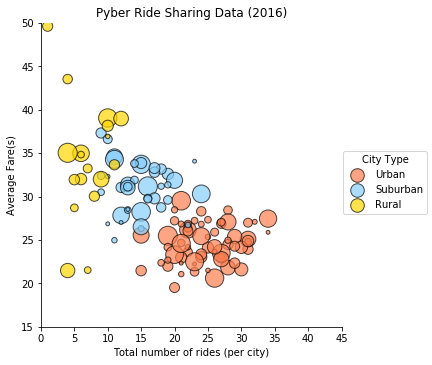

In [16]:
#flatui= ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
colors=['#FF7F50','#87CEFA','#FFD700']
sns.lmplot(x="Total Rides", 
           y="Average Fare",
           data = df,
           fit_reg=False,
           hue= "City Type",
          palette = colors,
          scatter_kws={"s": total_drivers*5, 
                       "alpha":0.7, 
                       "linewidth":1, 
                       "edgecolor":"black"
                      })
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylim(15,50)
plt.xlim(0,45)
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fare(s)")
#figsize=(20,5)

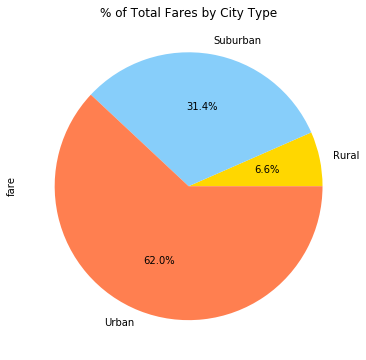

In [13]:
#% of Total Fares by City Type
fares_citytype = ride_city.groupby('type')['fare'].sum()
plt.axis("equal")
fare_citychart = fares_citytype.plot(kind='pie', figsize=(6,6), title="% of Total Fares by City Type", autopct="%1.1f%%", colors=('#FFD700','#87CEFA','#FF7F50'))

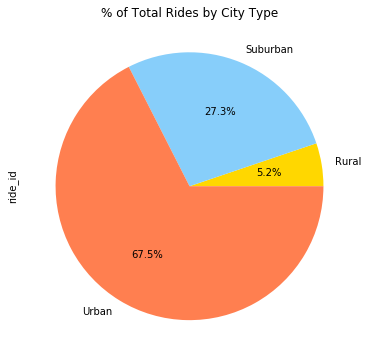

In [14]:
#% of Total Rides by City Type
totalrides_citytype = ride_city.groupby('type')['ride_id'].count()
plt.axis("equal")
rides_citychart = totalrides_citytype.plot(kind='pie', figsize=(6,6), title="% of Total Rides by City Type", autopct="%1.1f%%",  colors=('#FFD700','#87CEFA','#FF7F50'))

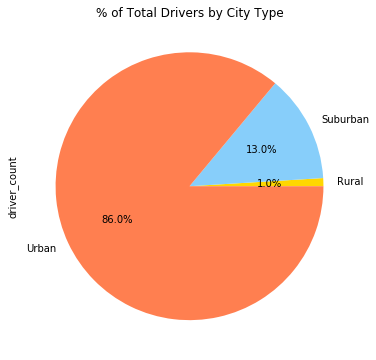

In [15]:
#% of Drivers by City type
totaldrivers_citytype = ride_city.groupby('type')['driver_count'].sum()
plt.axis("equal")
drivers_citychart = totaldrivers_citytype.plot(kind='pie', figsize=(6,6), title="% of Total Drivers by City Type", autopct="%1.1f%%",  colors=('#FFD700','#87CEFA','#FF7F50'))